# Python機械学習クックブック

In [9]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


## 交差検証

In [4]:
digits = datasets.load_digits()
features = digits.data
target = digits.target

# 標準化器を作成
standardizer = StandardScaler()

# ロジスティック回帰器を作成
logit = LogisticRegression()

# パイプラインを作成
pipeline = make_pipeline(standardizer, logit)

# k分割交差検証器を作成
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# k分割交差検証を実行
cv_results = cross_val_score(pipeline, # パイプライン
                                features, # 特徴量行列
                                target, # ターゲットベクトル
                                cv=kf, # 分割方法
                                scoring="accuracy", # 評価指標
                                n_jobs=-1) # すべてのCPUコアを使用

# 平均を計算
print(cv_results.mean())

# すべてのスコアを表示
cv_results

0.9693916821849783


array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

## ベースライン回帰モデルの作成

In [6]:
from sklearn.dummy import DummyRegressor

boston = datasets.load_boston()
features, target = boston.data, boston.target

# 訓練セットとテストセットに分割
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

# ダミー回帰器を作成
dummy = DummyRegressor(strategy='mean')

# ダミー回帰器を訓練
dummy.fit(features_train, target_train)

# R^2スコアを計算
dummy.score(features_test, target_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


-0.001119359203955339

In [8]:
# すべてを20と予測するダミー回帰モデルを作成
clf = DummyRegressor(strategy='constant', constant=20)

# モデルを訓練
clf.fit(features_train, target_train)

# R^2スコアを計算
clf.score(features_test, target_test)

-0.06510502029325727

In [7]:
from sklearn.linear_model import LinearRegression
# 比較用にモデルを訓練してスコアを算出する
ols = LinearRegression()
ols.fit(features_train, target_train)

# R^2スコアを計算
ols.score(features_test, target_test)


0.635463843320211

## ベースラインクラス分類モデルの作成

In [10]:
from sklearn.dummy import DummyClassifier

iris = datasets.load_iris()
features = iris.data
target = iris.target

# 訓練セットとテストセットに分割
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

# ダミー分類器を作成
dummy = DummyClassifier(strategy='uniform', random_state=1)

# ダミー分類器を訓練
dummy.fit(features_train, target_train)

# 正解率を計算
dummy.score(features_test, target_test)

0.42105263157894735

## 2クラス分類機の評価

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 特徴量行列とターゲットベクトルを作成
X, y = make_classification(n_samples = 10000,
                            n_features = 3,
                            n_informative = 3,
                            n_redundant = 0,
                            n_classes = 2,
                            random_state = 1)

# ロジスティック回帰器を作成
logit = LogisticRegression()

# 正解率をスコアとして交差検証を実行
print(cross_val_score(logit, X, y, scoring="accuracy"))

# 適合率をスコアとして交差検証を実行
print(cross_val_score(logit, X, y, scoring="precision"))

# 再現率をスコアとして交差検証を実行
print(cross_val_score(logit, X, y, scoring="recall"))

# F1スコアをスコアとして交差検証を実行
print(cross_val_score(logit, X, y, scoring="f1"))


[0.9555 0.95   0.9585 0.9555 0.956 ]
[0.95963673 0.94820717 0.9635996  0.96149949 0.96060606]
[0.951 0.952 0.953 0.949 0.951]
[0.95529884 0.9500998  0.95827049 0.95520886 0.95577889]


## 2クラス分類器閾値の評価

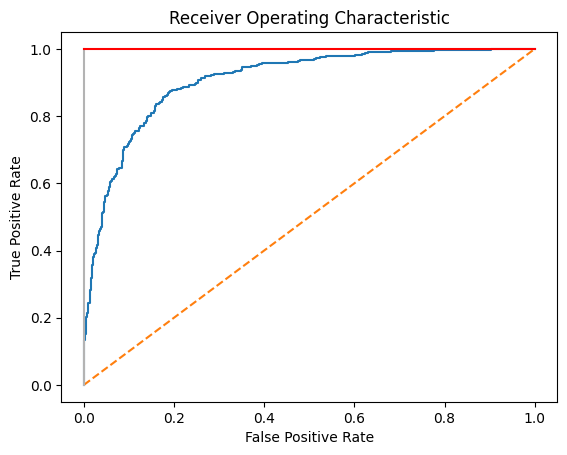

[[0.86891533 0.13108467]]
0.9073389355742297


In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import  make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

features, target = make_classification(n_samples=10000,
                                        n_features=10,
                                        n_classes=2,
                                        n_informative=3,
                                        random_state=3)

# 訓練セットとテストセットに分割
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# ロジスティック回帰器を作成
logit = LogisticRegression()

# モデルを訓練
logit.fit(features_train, target_train)

# 予測確率を計算
target_probabilities = logit.predict_proba(features_test)[:,1]

# 真陽性率と偽陽性率を計算
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# ROC曲線をプロット
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0],c=".7"), plt.plot([1,1],c="r")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# 予測確率の取得
print(logit.predict_proba(features_test)[0:1])

# ROC曲線の下の面積を計算
print(roc_auc_score(target_test, target_probabilities))


## 多クラス分類機による予測の評価

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

features, target = make_classification(
    n_samples=10000,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_classes=3,
    random_state=1,
)

# ロジスティック回帰器を作成
logit = LogisticRegression()

# 正解率をスコアとして交差検証を実行
print(cross_val_score(logit, features, target, scoring="accuracy"))

# マクロ平均適合率をスコアとして交差検証を実行
print(cross_val_score(logit, features, target, scoring="precision_macro"))

# マクロ平均再現率をスコアとして交差検証を実行
print(cross_val_score(logit, features, target, scoring="recall_macro"))

# マクロ平均F1スコアをスコアとして交差検証を実行
print(cross_val_score(logit, features, target, scoring="f1_macro"))

[0.841  0.829  0.8265 0.8155 0.82  ]
[0.84084737 0.82892836 0.82617407 0.81510466 0.81991138]
[0.84097366 0.82898341 0.82644282 0.81544078 0.81994306]
[0.84061272 0.82895312 0.82625661 0.81515121 0.81992692]


## クラス分類気性能の可視化

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


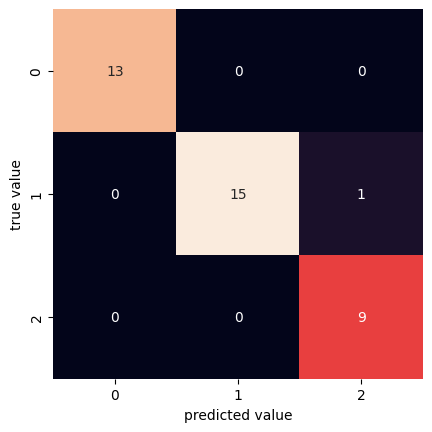

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()
features = iris.data
target = iris.target

# データセットを作成
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

# ロジスティック回帰器を作成
logit = LogisticRegression()

# モデルを訓練して予測
target_predicted = logit.fit(features_train, target_train).predict(features_test)

# 混同行列を作成
matrix = confusion_matrix(target_test, target_predicted)

# 混同行列を可視化
sns.heatmap(matrix, square=True, annot=True, cbar=False)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

## 回帰モデルの評価

In [23]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# 特徴量行列とターゲットベクトルを作成
features, target = make_regression(n_samples=100,
                                    n_features=3,
                                    n_informative=3,
                                    n_targets=1,
                                    noise=50,
                                    coef=False,
                                    random_state=1)

# 線形回帰器を作成
ols = LinearRegression()

# 負のMSEをスコアとして交差検証を実行
print(cross_val_score(ols, features, target, scoring="neg_mean_squared_error"))

# R^2をスコアとして交差検証を実行
print(cross_val_score(ols, features, target, scoring="r2"))

[-1974.65337976 -2004.54137625 -3935.19355723 -1060.04361386
 -1598.74104702]
[0.8622399  0.85838075 0.74723548 0.91354743 0.84469331]


## クラスタリングモデルの評価
クラスタリングモデルの評価はできない(読者が期待する方法では)

In [24]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples=1000,
                        n_features=10,
                        centers=2,
                        cluster_std=0.5,
                        shuffle=True,
                        random_state=1)

# k平均法クラスタリング器を作成
model = KMeans(n_clusters=2, random_state=1).fit(features)

# クラスタリング器を使ってクラスタを予測
target_predicted = model.labels_

# シルエットスコアを計算
silhouette_score(features, target_predicted)

0.8916265564072141

## 評価指標のカスタマイズ

In [31]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

features, target = make_regression(n_samples=100,
                                    n_features=3,
                                    random_state=1)

# 訓練セットとテストセットに分割
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.10, random_state=1)

# 独自の評価指標関数を作成
def custom_metric(target_test, target_predicted):
    # R^2スコアを計算
    r2 = r2_score(target_test, target_predicted)
    # R^2スコアを返す
    return r2

# スコア関数が高いほど良いというスコア関数を作成
score = make_scorer(custom_metric, greater_is_better=True)

# リッジ回帰器を作成
classifier = Ridge()

# リッジ回帰器を訓練
model = classifier.fit(features_train, target_train)

# カスタムスコア関数を使ってスコアを計算
print(score(model, features_test, target_test))

# 組み込みのスコア関数を使ってスコアを計算
target_predicted = model.predict(features_test)
print(r2_score(target_test, target_predicted))

0.9997906102882058
0.9997906102882058


## 訓練セットサイズによる影響の可視化

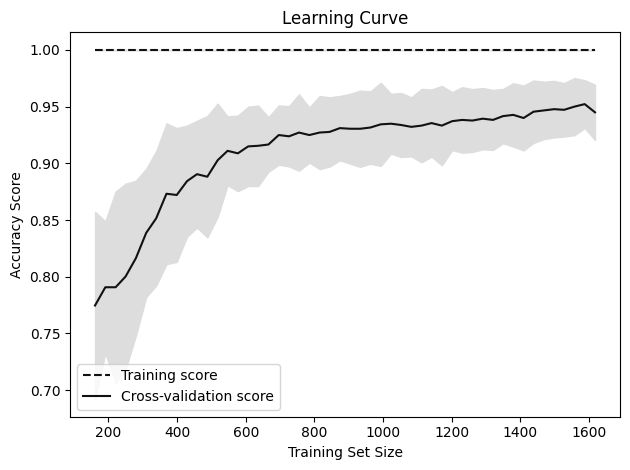

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

digits = datasets.load_digits()

# 特徴量行列を作成
features = digits.data
target = digits.target

# 訓練セットサイズを変更しながら交差検証を用いた訓練を行い、スコアを取得
train_sizes, train_scores, test_scores = learning_curve(  # 分類器
    RandomForestClassifier(),
    # 特徴量行列
    features,
    # ターゲットベクトル
    target,
    # 分割数
    cv=10,
    # パフォーマンス指標
    scoring="accuracy",
    # 全てのCPUコアを使用
    n_jobs=-1,
    # トレーニングセットのサイズ
    # train_sizes=[0.1, 0.25, 0.5, 0.75, 1],
    train_sizes=np.linspace(0.1, 1.0, 50),  # 50パターン
)

# トレーニングセットスコアの平均と分散を計算
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# テストセットスコアの平均と分散を計算
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# グラフを作成
plt.plot(
    train_sizes, train_mean, "--", color="#111111", label="Training score"
)
plt.plot(
    train_sizes, test_mean, color="#111111", label="Cross-validation score"
)

# 標準偏差の範囲を塗りつぶす
plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    color="#DDDDDD",
)
plt.fill_between(
    train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD"
)

# プロットを作成
plt.title("Learning Curve")

# 軸ラベルを追加
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## ハイパーパラメータの効果の可視化

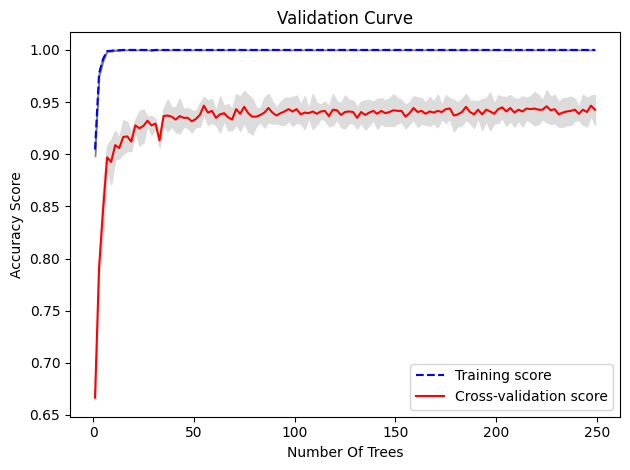

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

digits = datasets.load_digits()
features, target = digits.data, digits.target

# パラメータの値の範囲を指定
param_range = np.arange(1, 250, 2)

# パラメータとスコアの関係を調べる
train_scores, test_scores = validation_curve(
    # 分類器
    RandomForestClassifier(),
    # 特徴量行列
    features,
    # ターゲットベクトル
    target,
    # 調査するパラメータ
    param_name="n_estimators",
    # 調査するパラメータの値の範囲
    param_range=param_range,
    # 分割数
    cv=3,
    # パフォーマンス指標
    scoring="accuracy",
    # 全てのCPUコアを使用
    n_jobs=-1,
)

# トレーニングセットスコアの平均と分散を計算
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# テストセットスコアの平均と分散を計算
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# グラフを作成
plt.plot(
    param_range, train_mean, "--", color="blue", label="Training score"
)
plt.plot(
    param_range, test_mean, color="red", label="Cross-validation score"
)

# 標準偏差の範囲を塗りつぶす
plt.fill_between(
    param_range,
    train_mean - train_std,
    train_mean + train_std,
    color="gray"
)
plt.fill_between(
    param_range, test_mean - test_std, test_mean + test_std, color="gainsboro"
)

# プロットを作成
plt.title("Validation Curve")

# 軸ラベルを追加
plt.xlabel("Number Of Trees"), plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

